<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/regresion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

In [3]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()


57026/57026 [==============================] - 0s 0us/step


In [9]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
train_labels[0]

15.2

Para evitar que el modelo experimente un sesgo debido a las grandes diferencias de magnitud de los valores, debemos realizar un proceso de normalización

In [ ]:
#restaremos la media y dividirimos por la desv estandar, para normalizar de 0 a 1 todos los datos

In [12]:
mean = train_data.mean(axis=0) #media de los valores de cada una de las columnas
train_data = train_data - mean
std = train_data.std(axis=0)
train_data= train_data/std

test_data = test_data -mean #La razón por la cual utilizamos la media y la desviación
test_data = test_data /std  # de la data de entrenamiento es por ética, debido a que
                            # a los datos de test, no les debería dar ninguna información de si mismos 

### Crearemos el modelo

In [35]:
def build_model_regression(lr_var,input_data):
  model = models.Sequential()
  model.add (layers.Dense(64,activation= "relu",input_shape=(input_data,)))
  model.add(layers.Dense(64,activation="relu"))
  model.add(layers.Dense(1)) #al ser lineal, no necesito poner una función de activación

  model.compile(optimizer=optimizers.RMSprop(lr=lr_var),
                loss="mse",
                metrics=["mae"])
  return model

In [45]:
k = 4
num_val_samples = len(train_data) // k
num_empoch =85
all_history=[]

In [27]:
valor=2
num_val_samples

101

In [46]:
for i in range(k):
  print("fold: ",i)
  val_data= train_data[i*num_val_samples : (i+1) * num_val_samples]
  val_targets=train_labels[i*num_val_samples : (i+1)* num_val_samples]

  partial_train_data= np.concatenate(
      [train_data[:i *num_val_samples],
       train_data[(i+1)*num_val_samples:]
       ],
       axis=0)
  
  partial_train_targets= np.concatenate(
      [train_labels[:i *num_val_samples],
       train_labels[(i+1)*num_val_samples:]
       ],
       axis=0)
  
  model= build_model_regression(0.001,13)
  history = model.fit(partial_train_data, partial_train_targets,
                      epochs= num_empoch,
                      batch_size=16,
                      validation_data=(val_data,val_targets),
                      verbose=0)
  
  all_history.append(history.history["val_mae"])



fold:  0


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


fold:  1
fold:  2
fold:  3


In [47]:
all_mae_avg= pd.DataFrame(all_history).mean(axis=0)

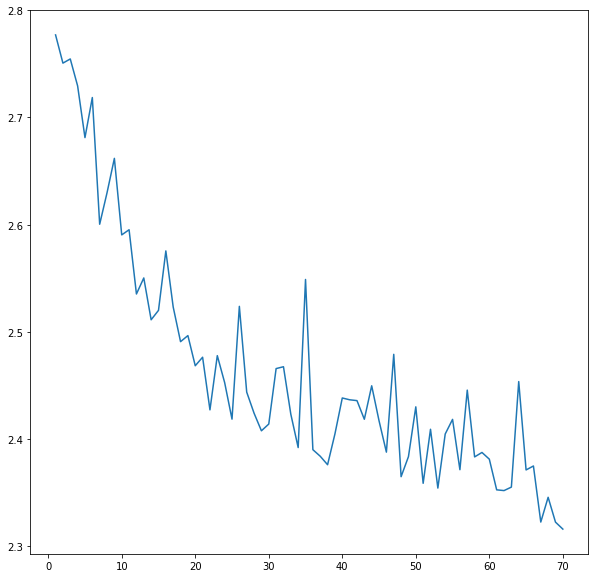

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1),all_mae_avg[15:])
plt.show()

In [49]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 19.8934 - mae: 2.8384


[19.893430709838867, 2.838350296020508]